# HMM: Analysis of Ukrainian Alphabet

In [6]:
import pandas
from matplotlib import pyplot as plt
import time
import hmm

In [2]:
pandas.set_option('display.max_columns', None)
pandas.set_option('display.float_format', '{:0.4f}'.format)

There are available several texts of such authors:
- Марко Вовчок:
  - Дев'ять братів
  - Інститутка
  - Кармелюк
  - Три долі
- Пантелеймон Куліш
  - Чорна рада
  - Огненний змій

Проаналізуємо тексти Марка Вовчка

### HMM with two hidden states

In [3]:
bw_marko_bratu_2 = hmm.BaumWelchRunner({
  "N": 2,
  "eps": 2e-3,
  "min_iterations": 20,
  
  "input_file": "bw-input-marko-bratu-2.json",
  "output_file": "bw-results/marko-bratu-2.json",
})
bw_marko_bratu_2.load_data('texts/M_Vovchok/devyat_brativ.txt', keep_spaces=True)
bw_marko_bratu_2.generate_initial({
  "P": "normal",
  "A": "normal",
  "B": "evenly",
})

In [4]:
bw_marko_bratu_2.prepare_input()
bw_marko_bratu_2.run()
bw_marko_bratu_2.read_results()
print(f"Iterations: {bw_marko_bratu_2.iterations()}")

V:  жиласобіудвкєнптемщягрїчзцхюшйьф
Data[0..15]: @[0, 1, 2, 3, 4, 0, 5, 6, 7, 8, 0, 9, 10, 6, 11, 4]
Observation sequence length (T): 75476
Passed 20 iterations. Expected 8.33041184798109 iterations per second.
Average iterations per second: 8.684056122902284
Iterations: 104


[Clustering by maximum]
Cluster 0:  ['и' 'а' 'о' 'і' 'у' 'е' 'я' 'ь']
Cluster 1:  [' ' 'ж' 'л' 'с' 'б' 'д' 'в' 'к' 'є' 'н' 'п' 'т' 'м' 'щ' 'г' 'р' 'ї' 'ч'
 'з' 'ц' 'х' 'ю' 'ш' 'й' 'ф']
[Clustering by kmeans]
Cluster 0:  ['и' 'а' 'о' 'і' 'у' 'е']
Cluster 1:  [' ' 'ж' 'л' 'с' 'б' 'д' 'в' 'к' 'є' 'н' 'п' 'т' 'м' 'щ' 'я' 'г' 'р' 'ї'
 'ч' 'з' 'ц' 'х' 'ю' 'ш' 'й' 'ь' 'ф']


/tmp/ipykernel_474909/361630971.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


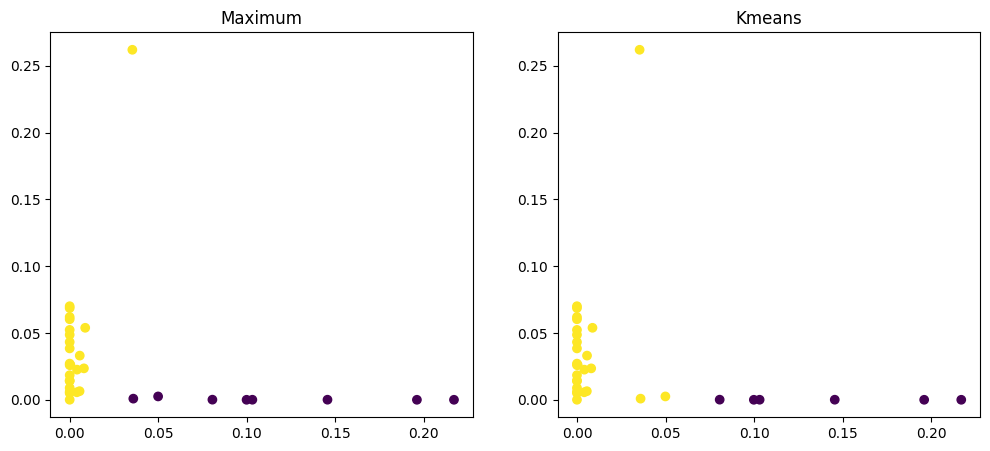

In [12]:
fig = plt.figure(figsize=(12, 5))

print("[Clustering by maximum]")
clusters = bw_marko_bratu_2.show_clusters_max()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
# fig = plt.figure()
# fig.suptitle('Maximum')
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Maximum')
ax1.scatter(
  bw_marko_bratu_2.results['model']['B'][0],
  bw_marko_bratu_2.results['model']['B'][1],
  c=clusters[1].tolist()
)
# fig.show()

print("[Clustering by kmeans]")
clusters = bw_marko_bratu_2.show_clusters_kmeans()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
# fig = plt.figure()
# fig.suptitle('Kmeans')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Kmeans')
ax2.scatter(
  bw_marko_bratu_2.results['model']['B'][0],
  bw_marko_bratu_2.results['model']['B'][1],
  c=clusters[1].tolist()
)

fig.savefig(f'plots/marko-bratu-clustering-{time.time()}.png')
fig.show()

In [13]:
pandas.DataFrame(bw_marko_bratu_2.results['model']['A'])

,0,1
0,0.0007,0.9993
1,0.6302,0.3698


In [15]:
bw_marko_bratu_2.results['model']['B'].T

,,ж,и,л,а,с,о,б,і,у,д,в,к,є,н,п,т,е,м,щ,я,г,р,ї,ч,з,ц,х,ю,ш,й,ь,ф
0,0.0354,0.0000,0.1455,0.0000,0.1960,0.0088,0.2170,0.0004,0.1031,0.0806,0.0000,0.0000,0.0000,0.0000,0.0000,0.0057,0.0000,0.0999,0.0000,0.0000,0.0499,0.0000,0.0000,0.0040,0.0000,0.0080,0.0000,0.0000,0.0056,0.0000,0.0041,0.0359,0.0000
1,0.2620,0.0142,0.0001,0.0603,0.0000,0.0539,0.0000,0.0261,0.0000,0.0001,0.0432,0.0620,0.0523,0.0050,0.0700,0.0331,0.0686,0.0000,0.0385,0.0089,0.0025,0.0271,0.0487,0.0056,0.0260,0.0235,0.0060,0.0184,0.0064,0.0143,0.0226,0.0009,0.0000


In [18]:
bw_marko_instytutka_2 = hmm.BaumWelchRunner({
  "N": 2,
  "eps": 2e-3,
  "min_iterations": 20,
  
  "input_file": "bw-input-marko-instytutka-2.json",
  "output_file": "bw-results/marko-instutytka-2.json",
})
bw_marko_instytutka_2.load_data('texts/M_Vovchok/instytutka.txt', keep_spaces=True)
bw_marko_instytutka_2.generate_initial({
  "P": "evenly",
  "A": "normal",
  "B": "normal",
})

In [19]:
bw_marko_instytutka_2.prepare_input()
bw_marko_instytutka_2.run()
bw_marko_instytutka_2.read_results()
print(f"Iterations: {bw_marko_instytutka_2.iterations()}")

V:  тгшевчнкуілюдиьсящоайрбзжмцпхєїф
Data[0..15]: @[0, 1, 2, 0, 3, 4, 5, 6, 4, 7, 8, 9, 0, 0, 10, 0]
Observation sequence length (T): 63715
Passed 20 iterations. Expected 10.74321186155402 iterations per second.
Average iterations per second: 10.89741218396557
Iterations: 144


[Clustering by maximum]
Cluster 0:  ['е' 'у' 'і' 'и' 'ь' 'я' 'о' 'а' 'ф']
Cluster 1:  [' ' 'т' 'г' 'ш' 'в' 'ч' 'н' 'к' 'л' 'ю' 'д' 'с' 'щ' 'й' 'р' 'б' 'з' 'ж'
 'м' 'ц' 'п' 'х' 'є' 'ї']
[Clustering by kmeans]
Cluster 0:  ['е' 'у' 'і' 'и' 'о' 'а']
Cluster 1:  [' ' 'т' 'г' 'ш' 'в' 'ч' 'н' 'к' 'л' 'ю' 'д' 'ь' 'с' 'я' 'щ' 'й' 'р' 'б'
 'з' 'ж' 'м' 'ц' 'п' 'х' 'є' 'ї' 'ф']


/tmp/ipykernel_474909/116928641.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_474909/116928641.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


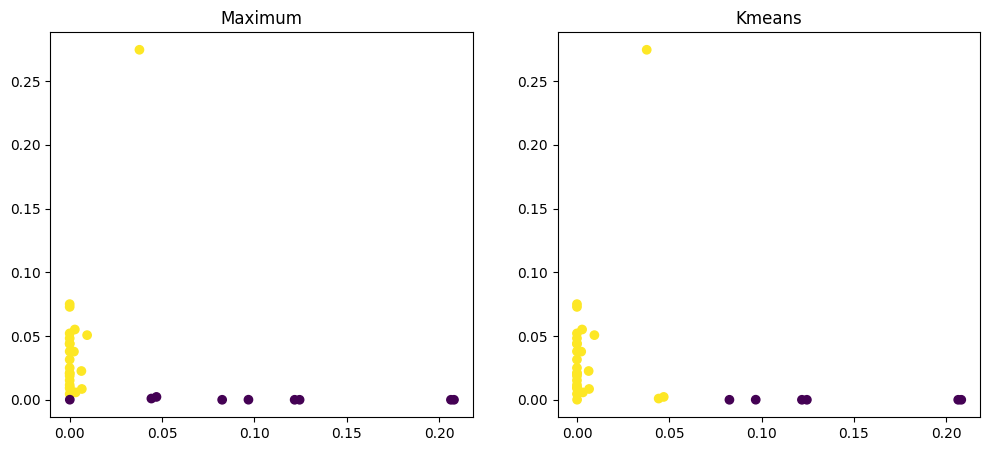

In [20]:
fig = plt.figure(figsize=(12, 5))

print("[Clustering by maximum]")
clusters = bw_marko_instytutka_2.show_clusters_max()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
# fig = plt.figure()
# fig.suptitle('Maximum')
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Maximum')
ax1.scatter(
  bw_marko_instytutka_2.results['model']['B'][0],
  bw_marko_instytutka_2.results['model']['B'][1],
  c=clusters[1].tolist()
)
fig.show()

print("[Clustering by kmeans]")
clusters = bw_marko_instytutka_2.show_clusters_kmeans()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
# fig = plt.figure()
# fig.suptitle('Kmeans')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Kmeans')
ax2.scatter(
  bw_marko_instytutka_2.results['model']['B'][0],
  bw_marko_instytutka_2.results['model']['B'][1],
  c=clusters[1].tolist()
)

fig.savefig(f'plots/marko-instutytka-clustering-{time.time()}.png')
fig.show()

In [21]:
pandas.DataFrame(bw_marko_instytutka_2.results['model']['A'])

,0,1
0,0.0011,0.9989
1,0.6147,0.3853


In [22]:
bw_marko_instytutka_2.results['model']['B'].T

,,т,г,ш,е,в,ч,н,к,у,і,л,ю,д,и,ь,с,я,щ,о,а,й,р,б,з,ж,м,ц,п,х,є,ї,ф
0,0.0378,0.0000,0.0000,0.0001,0.1245,0.0028,0.0000,0.0000,0.0000,0.0826,0.0968,0.0000,0.0066,0.0000,0.1218,0.0442,0.0094,0.0470,0.0000,0.2065,0.2081,0.0000,0.0000,0.0000,0.0063,0.0000,0.0000,0.0000,0.0023,0.0000,0.0000,0.0032,0.0001
1,0.2747,0.0729,0.0210,0.0098,0.0000,0.0552,0.0250,0.0751,0.0521,0.0000,0.0001,0.0482,0.0085,0.0439,0.0000,0.0010,0.0507,0.0022,0.0091,0.0000,0.0000,0.0205,0.0440,0.0315,0.0226,0.0188,0.0380,0.0046,0.0378,0.0153,0.0116,0.0058,0.0001


Let's pick $N = 3$

In [23]:
bw_marko_instytutka_3 = hmm.BaumWelchRunner({
  "N": 3,
  "eps": 2e-3,
  "min_iterations": 20,
  
  "input_file": "bw-input-marko-instytutka-3.json",
  "output_file": "bw-results/marko-instutytka-3.json",
})
bw_marko_instytutka_3.load_data('texts/M_Vovchok/instytutka.txt', keep_spaces=True)
bw_marko_instytutka_3.generate_initial({
  "P": "evenly",
  "A": "normal",
  "B": "normal",
})
bw_marko_instytutka_3.__str__()

'<BaumWelch Runner bw-input-marko-instytutka-3.json -> bw-results/marko-instutytka-3.json>'

In [24]:
bw_marko_instytutka_3.prepare_input()
bw_marko_instytutka_3.run()
bw_marko_instytutka_3.read_results()
print(f"Iterations: {bw_marko_instytutka_3.iterations()}")

V:  тгшевчнкуілюдиьсящоайрбзжмцпхєїф
Data[0..15]: @[0, 1, 2, 0, 3, 4, 5, 6, 4, 7, 8, 9, 0, 0, 10, 0]
Observation sequence length (T): 63715
Passed 20 iterations. Expected 6.914413734815939 iterations per second.
Average iterations per second: 7.179081740736385
Iterations: 271


[Clustering by maximum]
Cluster 0:  ['т' 'г' 'в' 'ч' 'н' 'к' 'л' 'д' 'с' 'щ' 'р' 'б' 'ж' 'м' 'ц' 'п' 'х']
Cluster 1:  ['е' 'у' 'і' 'и' 'ь' 'я' 'о' 'а']
Cluster 2:  [' ' 'ш' 'ю' 'й' 'з' 'є' 'ї' 'ф']
[Clustering by kmeans]
Cluster 0:  ['т' 'г' 'ш' 'в' 'ч' 'н' 'к' 'л' 'ю' 'д' 'ь' 'с' 'я' 'щ' 'й' 'р' 'б' 'з'
 'ж' 'м' 'ц' 'п' 'х' 'є' 'ї' 'ф']
Cluster 1:  [' ']
Cluster 2:  ['е' 'у' 'і' 'и' 'о' 'а']


/tmp/ipykernel_474909/1768219415.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_474909/1768219415.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


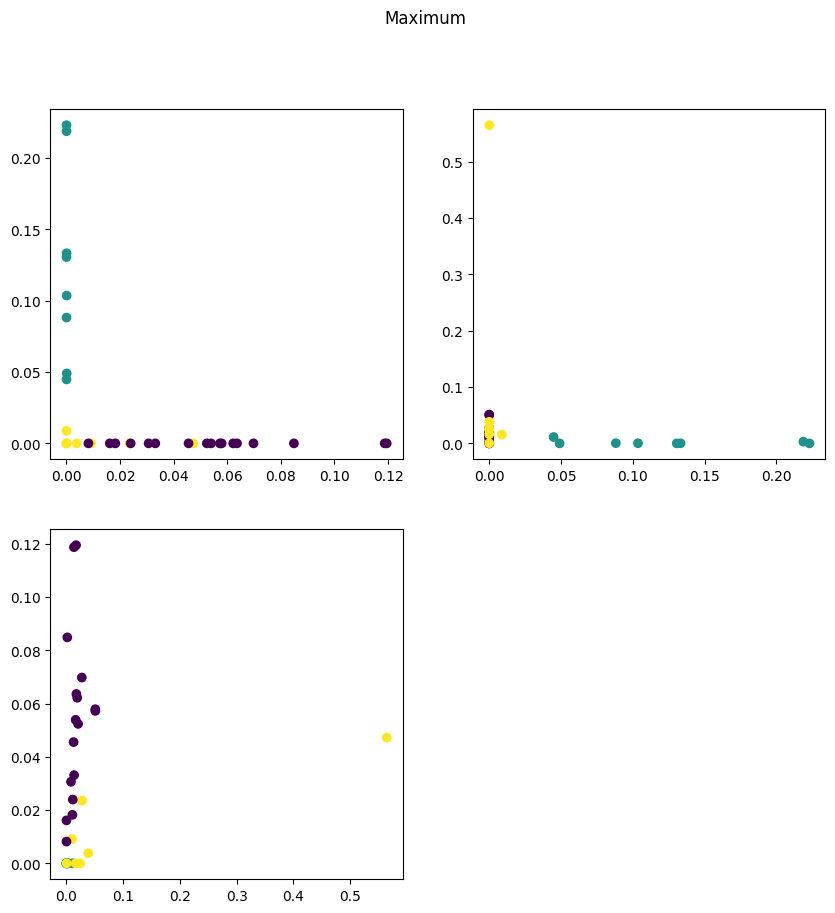

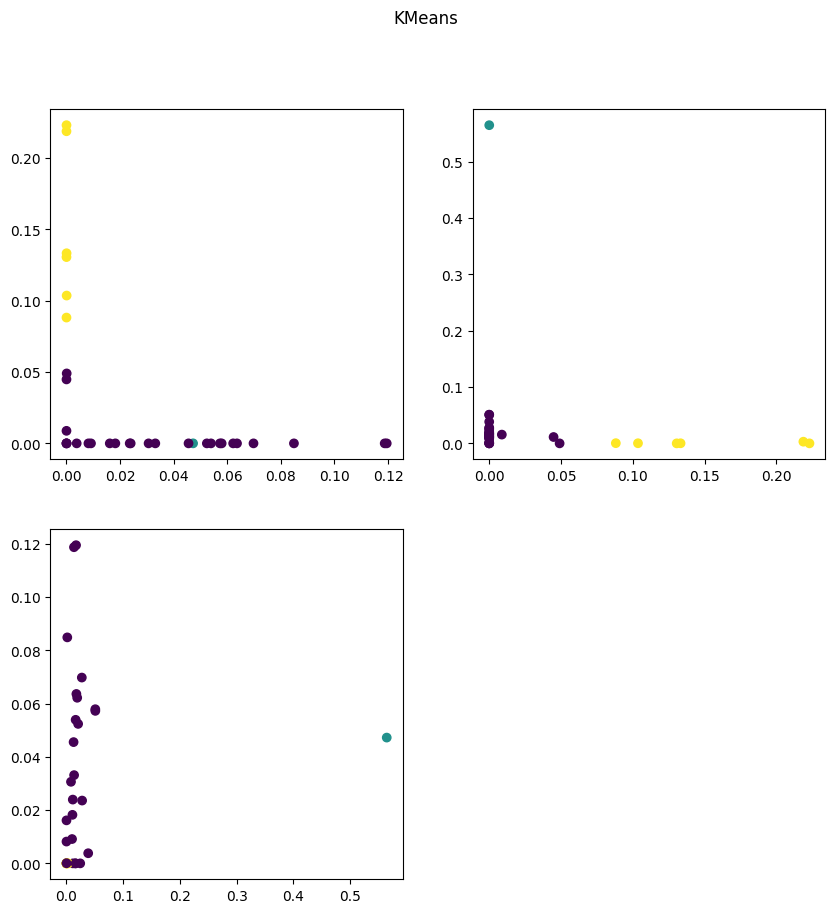

In [25]:
# fig = plt.figure(figsize=(12, 5))

print("[Clustering by maximum]")
clusters = bw_marko_instytutka_3.show_clusters_max()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Maximum')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.scatter(
  bw_marko_instytutka_3.results['model']['B'][0],
  bw_marko_instytutka_3.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_marko_instytutka_3.results['model']['B'][1],
  bw_marko_instytutka_3.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_marko_instytutka_3.results['model']['B'][2],
  bw_marko_instytutka_3.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.savefig(f'plots/marko-instutytka-clustering-3-max-{time.time()}.png')
fig.show()

print("[Clustering by kmeans]")
clusters = bw_marko_instytutka_3.show_clusters_kmeans()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
fig = plt.figure(figsize=(10, 10))
fig.suptitle('KMeans')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.scatter(
  bw_marko_instytutka_3.results['model']['B'][0],
  bw_marko_instytutka_3.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_marko_instytutka_3.results['model']['B'][1],
  bw_marko_instytutka_3.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_marko_instytutka_3.results['model']['B'][2],
  bw_marko_instytutka_3.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.savefig(f'plots/marko-instutytka-clustering-3-kmeans-{time.time()}.png')
fig.show()

In [26]:
pandas.DataFrame(bw_marko_instytutka_3.results['model']['A'])

,0,1,2
0,0.0114,0.9886,0.0000
1,0.4226,0.0000,0.5774
2,0.6476,0.0420,0.3104


In [27]:
bw_marko_instytutka_3.results['model']['B'].T

,,т,г,ш,е,в,ч,н,к,у,і,л,ю,д,и,ь,с,я,щ,о,а,й,р,б,з,ж,м,ц,п,х,є,ї,ф
0,0.0472,0.1187,0.0306,0.0091,0.0000,0.0579,0.0331,0.1195,0.0698,0.0000,0.0001,0.0849,0.0000,0.0622,0.0000,0.0001,0.0573,0.0000,0.0162,0.0000,0.0000,0.0038,0.0636,0.0455,0.0236,0.0240,0.0539,0.0082,0.0524,0.0182,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.1333,0.0000,0.0000,0.0000,0.0000,0.0882,0.1036,0.0000,0.0088,0.0000,0.1306,0.0490,0.0000,0.0448,0.0000,0.2188,0.2230,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.5646,0.0132,0.0080,0.0098,0.0002,0.0508,0.0134,0.0169,0.0270,0.0004,0.0002,0.0014,0.0156,0.0189,0.0000,0.0000,0.0508,0.0113,0.0000,0.0030,0.0000,0.0383,0.0174,0.0125,0.0276,0.0111,0.0162,0.0000,0.0205,0.0105,0.0242,0.0161,0.0002


In [28]:
bw_marko_instytutka_4 = hmm.BaumWelchRunner({
  "N": 4,
  "eps": 1e-5,
  "min_iterations": 20,
  
  "input_file": "bw-input-marko-instytutka-4.json",
  "output_file": "bw-results/marko-instutytka-4.json",
})
bw_marko_instytutka_4.load_data('texts/M_Vovchok/instytutka.txt', keep_spaces=True)
bw_marko_instytutka_4.generate_initial({
  "P": "normal",
  "A": "normal",
  "B": "normal",
})
bw_marko_instytutka_4.__str__()

'<BaumWelch Runner bw-input-marko-instytutka-4.json -> bw-results/marko-instutytka-4.json>'

In [30]:
bw_marko_instytutka_4.prepare_input()
bw_marko_instytutka_4.run()
bw_marko_instytutka_4.read_results()
print(f"Iterations: {bw_marko_instytutka_4.iterations()}")

V:  тгшевчнкуілюдиьсящоайрбзжмцпхєїф
Data[0..15]: @[0, 1, 2, 0, 3, 4, 5, 6, 4, 7, 8, 9, 0, 0, 10, 0]
Observation sequence length (T): 63715
Passed 20 iterations. Expected 4.672081731906311 iterations per second.
Average iterations per second: 4.990342312532962
Iterations: 999


[Clustering by maximum]
Cluster 0:  ['е' 'у' 'і' 'и' 'ь' 'о' 'а']
Cluster 1:  ['т' 'г' 'ш' 'ч' 'н' 'к' 'л' 'д' 'щ' 'р' 'б' 'ж' 'м' 'ц' 'п' 'х']
Cluster 2:  [' ' 'ю' 'є']
Cluster 3:  ['в' 'с' 'я' 'й' 'з' 'ї' 'ф']
[Clustering by kmeans]
Cluster 0:  ['г' 'ш' 'ч' 'ю' 'ь' 'я' 'щ' 'й' 'з' 'ж' 'ц' 'х' 'є' 'ї' 'ф']
Cluster 1:  [' ']
Cluster 2:  ['е' 'у' 'і' 'и' 'о' 'а']
Cluster 3:  ['т' 'в' 'н' 'к' 'л' 'д' 'с' 'р' 'б' 'м' 'п']


/tmp/ipykernel_474909/1190681184.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_474909/1190681184.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


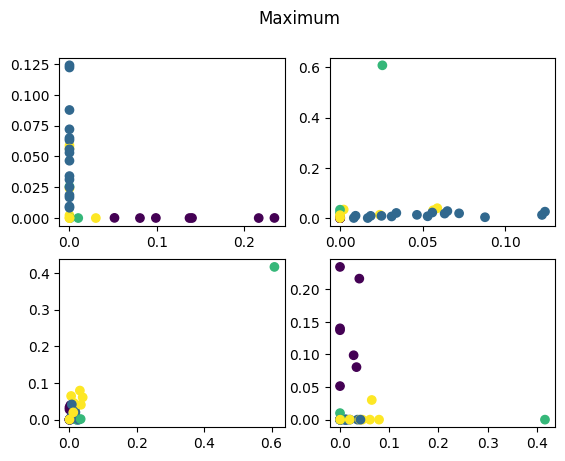

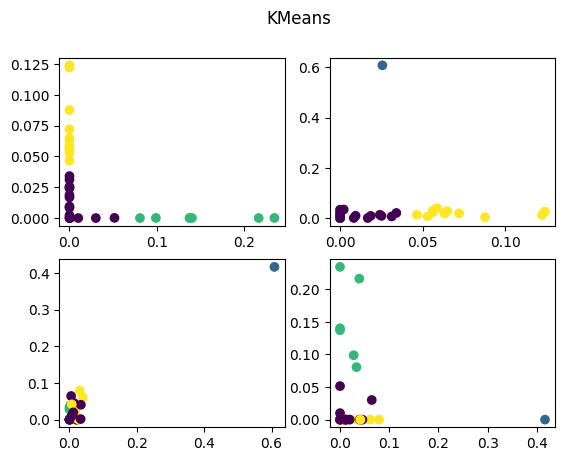

In [31]:
print("[Clustering by maximum]")
clusters = bw_marko_instytutka_4.show_clusters_max()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
  
fig = plt.figure()
fig.suptitle('Maximum')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(
  bw_marko_instytutka_4.results['model']['B'][0],
  bw_marko_instytutka_4.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_marko_instytutka_4.results['model']['B'][1],
  bw_marko_instytutka_4.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_marko_instytutka_4.results['model']['B'][2],
  bw_marko_instytutka_4.results['model']['B'][3],
  c=clusters[1].tolist()
)
ax4.scatter(
  bw_marko_instytutka_4.results['model']['B'][3],
  bw_marko_instytutka_4.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.show()
fig.savefig(f'plots/marko-instutytka-clustering-4-max-{time.time()}.png')

print("[Clustering by kmeans]")
clusters = bw_marko_instytutka_4.show_clusters_kmeans()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)

fig = plt.figure()
fig.suptitle('KMeans')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(
  bw_marko_instytutka_4.results['model']['B'][0],
  bw_marko_instytutka_4.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_marko_instytutka_4.results['model']['B'][1],
  bw_marko_instytutka_4.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_marko_instytutka_4.results['model']['B'][2],
  bw_marko_instytutka_4.results['model']['B'][3],
  c=clusters[1].tolist()
)
ax4.scatter(
  bw_marko_instytutka_4.results['model']['B'][3],
  bw_marko_instytutka_4.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.show()
fig.savefig(f'plots/marko-instutytka-clustering-4-kmeans-{time.time()}.png')

In [32]:
pandas.DataFrame(bw_marko_instytutka_4.results['model']['A'])

,0,1,2,3
0,0.0000,0.3996,0.5983,0.0021
1,0.9968,0.0009,0.0023,0.0000
2,0.0295,0.5959,0.0002,0.3744
3,0.0000,0.6115,0.0000,0.3885


In [33]:
bw_marko_instytutka_4.results['model']['B'].T

,,т,г,ш,е,в,ч,н,к,у,і,л,ю,д,и,ь,с,я,щ,о,а,й,р,б,з,ж,м,ц,п,х,є,ї,ф
0,0.0000,0.0000,0.0000,0.0000,0.1401,0.0000,0.0000,0.0000,0.0000,0.0806,0.0988,0.0000,0.0100,0.0000,0.1372,0.0515,0.0000,0.0301,0.0000,0.2164,0.2344,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0008,0.0001,0.0000
1,0.0256,0.1221,0.0312,0.0094,0.0000,0.0588,0.0340,0.1239,0.0720,0.0000,0.0001,0.0877,0.0000,0.0633,0.0000,0.0001,0.0563,0.0000,0.0168,0.0000,0.0001,0.0022,0.0649,0.0465,0.0241,0.0251,0.0558,0.0083,0.0530,0.0185,0.0000,0.0000,0.0000
2,0.6086,0.0124,0.0063,0.0091,0.0002,0.0392,0.0203,0.0254,0.0187,0.0000,0.0001,0.0032,0.0215,0.0177,0.0000,0.0000,0.0309,0.0049,0.0001,0.0027,0.0000,0.0339,0.0277,0.0127,0.0131,0.0086,0.0220,0.0002,0.0070,0.0087,0.0332,0.0114,0.0001
3,0.4164,0.0152,0.0104,0.0088,0.0000,0.0608,0.0002,0.0000,0.0356,0.0334,0.0277,0.0000,0.0000,0.0201,0.0000,0.0000,0.0793,0.0645,0.0000,0.0392,0.0000,0.0405,0.0000,0.0115,0.0455,0.0120,0.0036,0.0001,0.0415,0.0120,0.0016,0.0197,0.0003


In [34]:
bw_kylish_rada_4 = hmm.BaumWelchRunner({
  "N": 4,
  "eps": 1e-2,
  "min_iterations": 35,
  
  "input_file": "bw-input-kylish-rada-4.json",
  "output_file": "bw-results/kylish-rada-4.json",
})
bw_kylish_rada_4.load_data('texts/P_Kulish/Chorna_rada.txt', keep_spaces=True)
bw_kylish_rada_4.generate_initial({
  "P": "normal",
  "A": "normal",
  "B": "normal",
})
bw_kylish_rada_4.__str__()

'<BaumWelch Runner bw-input-kylish-rada-4.json -> bw-results/kylish-rada-4.json>'

In [37]:
bw_kylish_rada_4.prepare_input()
bw_kylish_rada_4.run()
bw_kylish_rada_4.read_results()
print(f"Iterations: {bw_kylish_rada_4.iterations()}")

V:  повесніркудєжхиабязльгшмйтюцїщчґф
Data[0..15]: @[0, 0, 1, 2, 0, 3, 4, 5, 6, 7, 0, 8, 2, 9, 10, 0]
Observation sequence length (T): 286868
Passed 35 iterations. Expected 1.053034604418279 iterations per second.
Average iterations per second: 1.047754042665709
Iterations: 141


[Clustering by maximum]
Cluster 0:  [' ']
Cluster 1:  ['о' 'е' 'і' 'у' 'и' 'а' 'я' 'ь']
Cluster 2:  ['в' 'к' 'є' 'ж' 'х' 'з' 'ш' 'м' 'й' 'ю' 'ї']
Cluster 3:  ['п' 'с' 'н' 'р' 'д' 'б' 'л' 'г' 'т' 'ц' 'щ' 'ч' 'ґ' 'ф']


/tmp/ipykernel_474909/161866778.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[Clustering by kmeans]
Cluster 0:  [' ']
Cluster 1:  ['п' 'с' 'н' 'р' 'д' 'є' 'ж' 'х' 'б' 'я' 'л' 'ь' 'г' 'ш' 'т' 'ю' 'ц' 'ї'
 'щ' 'ч' 'ґ' 'ф']
Cluster 2:  ['о' 'е' 'і' 'у' 'и' 'а']
Cluster 3:  ['в' 'к' 'з' 'м' 'й']


/tmp/ipykernel_474909/161866778.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


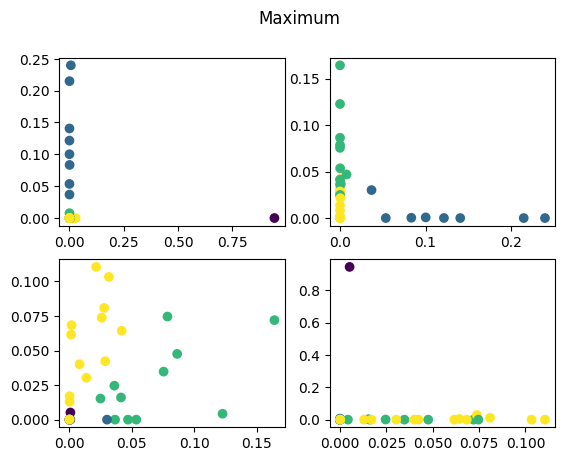

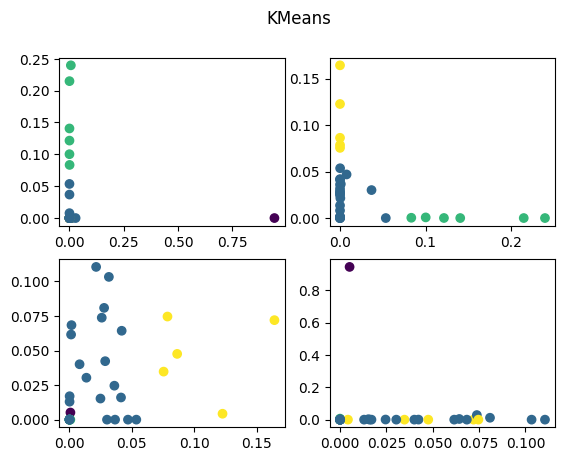

In [38]:
print("[Clustering by maximum]")
clusters = bw_kylish_rada_4.show_clusters_max()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
fig = plt.figure()
fig.suptitle('Maximum')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(
  bw_kylish_rada_4.results['model']['B'][0],
  bw_kylish_rada_4.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_kylish_rada_4.results['model']['B'][1],
  bw_kylish_rada_4.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_kylish_rada_4.results['model']['B'][2],
  bw_kylish_rada_4.results['model']['B'][3],
  c=clusters[1].tolist()
)
ax4.scatter(
  bw_kylish_rada_4.results['model']['B'][3],
  bw_kylish_rada_4.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.savefig(f'plots/kylish-chorna-rada-clustering-4-max-{time.time()}.png')
fig.show()

print("[Clustering by kmeans]")
clusters = bw_kylish_rada_4.show_clusters_kmeans()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
fig = plt.figure()
fig.suptitle('KMeans')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(
  bw_kylish_rada_4.results['model']['B'][0],
  bw_kylish_rada_4.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_kylish_rada_4.results['model']['B'][1],
  bw_kylish_rada_4.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_kylish_rada_4.results['model']['B'][2],
  bw_kylish_rada_4.results['model']['B'][3],
  c=clusters[1].tolist()
)
ax4.scatter(
  bw_kylish_rada_4.results['model']['B'][3],
  bw_kylish_rada_4.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.savefig(f'plots/kylish-chorna-rada-clustering-4-kmeans-{time.time()}.png')
fig.show()

In [39]:
pandas.DataFrame(bw_kylish_rada_4.results['model']['A'])

,0,1,2,3
0,0.0195,0.1296,0.0922,0.7588
1,0.3620,0.0000,0.1890,0.4490
2,0.6830,0.0000,0.0345,0.2826
3,0.0000,0.8853,0.0000,0.1147


In [40]:
bw_kylish_rada_4.results['model']['B'].T

,,п,о,в,е,с,н,і,р,к,у,д,є,ж,х,и,а,б,я,з,л,ь,г,ш,м,й,т,ю,ц,ї,щ,ч,ґ,ф
0,0.9436,0.0000,0.0064,0.0000,0.0000,0.0283,0.0000,0.0000,0.0117,0.0000,0.0006,0.0041,0.0008,0.0007,0.0000,0.0000,0.0001,0.0004,0.0001,0.0000,0.0000,0.0000,0.0000,0.0026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0008,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.2397,0.0000,0.1216,0.0000,0.0000,0.1002,0.0000,0.0000,0.0834,0.0000,0.0009,0.0000,0.0000,0.1406,0.2149,0.0000,0.0369,0.0000,0.0000,0.0535,0.0000,0.0000,0.0000,0.0000,0.0004,0.0077,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000
2,0.0008,0.0013,0.0000,0.1643,0.0001,0.0259,0.0316,0.0007,0.0278,0.0785,0.0003,0.0418,0.0365,0.0360,0.0413,0.0000,0.0000,0.0286,0.0301,0.0755,0.0016,0.0000,0.0081,0.0248,0.0863,0.1227,0.0214,0.0469,0.0001,0.0536,0.0001,0.0136,0.0000,0.0000
3,0.0052,0.0616,0.0000,0.0720,0.0000,0.0738,0.1033,0.0000,0.0809,0.0746,0.0000,0.0643,0.0000,0.0246,0.0160,0.0000,0.0000,0.0423,0.0000,0.0348,0.0684,0.0000,0.0401,0.0153,0.0476,0.0043,0.1105,0.0000,0.0130,0.0000,0.0170,0.0303,0.0001,0.0001


In [41]:
bw_kylish_rada_4_2 = hmm.BaumWelchRunner({
  "N": 4,
  "eps": 1e-2,
  "min_iterations": 35,
  
  "input_file": "bw-input-kylish-rada-4.json",
  "output_file": "bw-results/kylish-rada-4.json",
})
bw_kylish_rada_4_2.load_data('texts/P_Kulish/Chorna_rada.txt', keep_spaces=False)
bw_kylish_rada_4_2.generate_initial({
  "P": "normal",
  "A": "normal",
  "B": "normal",
})
bw_kylish_rada_4_2.__str__()

'<BaumWelch Runner bw-input-kylish-rada-4.json -> bw-results/kylish-rada-4.json>'

In [42]:
bw_kylish_rada_4_2.prepare_input()
bw_kylish_rada_4_2.run()
bw_kylish_rada_4_2.read_results()
print(f"Iterations: {bw_kylish_rada_4_2.iterations()}")

V: повесніркудєжхиабязльгшмйтюцїщчґф
Data[0..15]: @[0, 1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 10, 2, 1, 11, 0]
Observation sequence length (T): 234671
Passed 35 iterations. Expected 1.045546605015954 iterations per second.
Average iterations per second: 1.039884818250762
Iterations: 194


[Clustering by maximum]
Cluster 0:  ['о' 'е' 'і' 'у' 'и' 'а']
Cluster 1:  ['с' 'к' 'я' 'ь' 'ш' 'ґ']
Cluster 2:  ['п' 'н' 'р' 'д' 'ж' 'б' 'л' 'г' 'м' 'т' 'ц' 'щ' 'ч' 'ф']
Cluster 3:  ['в' 'є' 'х' 'з' 'й' 'ю' 'ї']


/tmp/ipykernel_474909/3879489101.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[Clustering by kmeans]
Cluster 0:  ['с' 'ь']
Cluster 1:  ['є' 'ж' 'х' 'б' 'я' 'з' 'г' 'ш' 'й' 'ю' 'ц' 'ї' 'щ' 'ч' 'ґ' 'ф']
Cluster 2:  ['о' 'е' 'і' 'у' 'и' 'а']
Cluster 3:  ['п' 'в' 'н' 'р' 'к' 'д' 'л' 'м' 'т']


/tmp/ipykernel_474909/3879489101.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


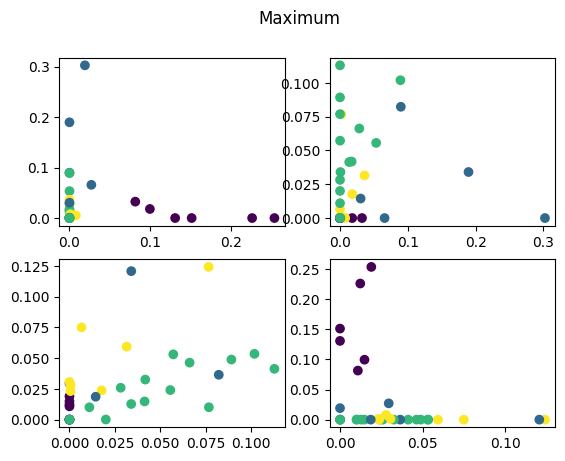

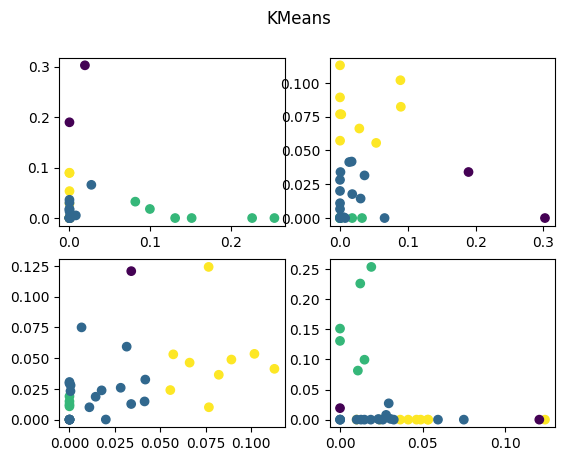

In [43]:
print("[Clustering by maximum]")
clusters = bw_kylish_rada_4_2.show_clusters_max()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
fig = plt.figure()
fig.suptitle('Maximum')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(
  bw_kylish_rada_4_2.results['model']['B'][0],
  bw_kylish_rada_4_2.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_kylish_rada_4_2.results['model']['B'][1],
  bw_kylish_rada_4_2.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_kylish_rada_4_2.results['model']['B'][2],
  bw_kylish_rada_4_2.results['model']['B'][3],
  c=clusters[1].tolist()
)
ax4.scatter(
  bw_kylish_rada_4_2.results['model']['B'][3],
  bw_kylish_rada_4_2.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.savefig(f'plots/kylish-chorna-rada-without-spaces-clustering-4-max-{time.time()}.png')
fig.show()

print("[Clustering by kmeans]")
clusters = bw_kylish_rada_4_2.show_clusters_kmeans()
for i, cl in enumerate(clusters[0]):
  print(f"Cluster {i}: ", cl)
fig = plt.figure()
fig.suptitle('KMeans')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(
  bw_kylish_rada_4_2.results['model']['B'][0],
  bw_kylish_rada_4_2.results['model']['B'][1],
  c=clusters[1].tolist()
)
ax2.scatter(
  bw_kylish_rada_4_2.results['model']['B'][1],
  bw_kylish_rada_4_2.results['model']['B'][2],
  c=clusters[1].tolist()
)
ax3.scatter(
  bw_kylish_rada_4_2.results['model']['B'][2],
  bw_kylish_rada_4_2.results['model']['B'][3],
  c=clusters[1].tolist()
)
ax4.scatter(
  bw_kylish_rada_4_2.results['model']['B'][3],
  bw_kylish_rada_4_2.results['model']['B'][0],
  c=clusters[1].tolist()
)
fig.savefig(f'plots/kylish-chorna-rada-without-spaces-clustering-4-kmeans-{time.time()}.png')
fig.show()

In [44]:
pandas.DataFrame(bw_kylish_rada_4_2.results['model']['A'])

,0,1,2,3
0,0.0098,0.0000,0.5921,0.3981
1,0.1782,0.2060,0.6158,0.0000
2,0.9992,0.0000,0.0008,0.0000
3,0.0258,0.2436,0.6901,0.0405


In [46]:
chorna_rada = hmm.read_text('texts/P_Kulish/Chorna_rada.txt')
devyat_brativ = hmm.read_text('texts/M_Vovchok/devyat_brativ.txt')
karmeliyk = hmm.read_text('texts/M_Vovchok/karmeluk.txt')

substring = 'сь'
print({
  "chorna_rada": chorna_rada.count(substring) / len(chorna_rada),
  "devyat_brativ": devyat_brativ.count(substring) / len(devyat_brativ),
  "karmeliyk": karmeliyk.count(substring) / len(karmeliyk),
})

{'chorna_rada': 0.00663371306663692, 'devyat_brativ': 0.003378557422226933, 'karmeliyk': 0.003376617962773829}
